<a href="https://colab.research.google.com/github/0xfffddd/Coding/blob/Coding-from-Colab/MGMT687_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Feature  Coefficient  Abs_Coefficient
8     CreditHistory     0.494960         0.494960
6   CheckingAccount    -0.469105         0.469105
4    InstallmentPct    -0.352962         0.352962
1    CreditDuration    -0.285640         0.285640
3      CreditAmount    -0.275068         0.275068
9    ExistingCredit    -0.250121         0.250121
16          Housing     0.221718         0.221718
13       Employment     0.174883         0.174883
11              Age     0.174812         0.174812
20    ForeignWorker    -0.150734         0.150734
Enter probability (from 0 to 1) threshold for predicting Good=1 (e.g., 0.5): 0.5
Accuracy: 0.72

Confusion Matrix:
[[ 19  38]
 [ 18 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.33      0.40        57
           1       0.77      0.87      0.82       143

    accuracy                           0.72       200
   macro avg       0.64      0.60      0.61       200
weighted avg    

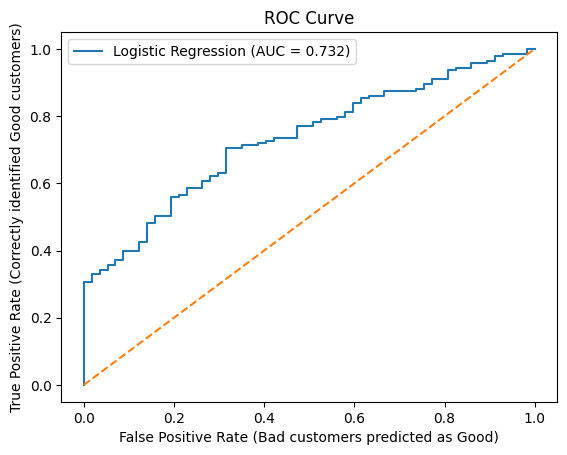

In [26]:
#Question1 -Lichen Mao

# 1. Import Necessary libraries and data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Load the data and parse the data
data = pd.read_csv('GermanCredit.csv')

# 2. Define result Y and predictor X, then preprocess the categorical predictor
y = data['Good']
X = data.drop('Good', axis=1)
#Use dummy variables to transfre categorical data
X = pd.get_dummies(X, drop_first=True)

# 3. Split and scaling, then weight the perdictor
# 80% training, 20% testing
X_reg, x_val, y_reg, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
scaler = StandardScaler()
X_reg = scaler.fit_transform(X_reg)
x_val = scaler.transform(x_val)

#4. Trainning model and make prediction
model1 = LogisticRegression(
    C=2.0,
    solver='lbfgs',
    max_iter=2000,
)
model1.fit(X_reg, y_reg)
# Consider the weight for the predictors, find out top predictors which affect the result
coefficients = model1.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)
print(importance_df.head(10))
y_prob = model1.predict_proba(x_val)[:, 1]

# 5. Input threshold for future analysis
threshold = float(input("Enter probability (from 0 to 1) threshold for predicting Good=1 (e.g., 0.5): "))
y_pred = (y_prob >= threshold).astype(int)

# 6. Output Result
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Plot AUC for future analysis
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc_score = roc_auc_score(y_val, y_prob)
print("AUC Score:", auc_score)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (Bad customers predicted as Good)')
plt.ylabel('True Positive Rate (Correctly identified Good customers)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Question2 -Lichen Mao**

**1. AUC (Area Under the ROC Curve)**

AUC measures the model's ability to make accurate predictions across all possible probability thresholds between 0 and 1. It evaluates how well the model can distinguish between good and bad credit risks independent of a specific cutoff value. In this model, the AUC is 0.732 (see results from Q1), which indicates that the model has meaningful discriminatory power. This suggests the model performs substantially better than random guessing (AUC = 0.5) and provides workable predictive capability.


**2. Confusion Matrix**

The confusion matrix shows the number of correct and incorrect classifications under a chosen threshold. In this case, using the default threshold of 0.5, the confusion matrix is

[18 39]

[18 125]

(see Q1 results)

This indicates that, in the validation dataset, the model achieves an overall accuracy of 72%, which exceeds random baseline performance and demonstrates reasonable predictive effectiveness. The matrix also provides insight into the types of errors (false approvals vs. false rejections), which is critical in credit risk applications.



**3. Precision & Recall**

I also used precision and recall to measure the quality of model, in validation dataset,the precision & Recall of Good= 0 and 1 is:

0.50      0.32  
0.76      0.87

(see Q1 results)

This is also a good result.

Above all, this model has good capability.


# **Question3 - Lichen Mao**

From mathematical perspective, the new threshold for this case can be calculated.

Consider **Tn** as new threshold in this case,

**Cfp** as cost of approving a bad case,

**Cfn** as cost of rejecting a good case,

Then from the question we will have :

Cfn = 5* Cfp

With cost sensitive learning calculation ,the new threshold (Tn) equals to:

Tn=Cfp/(Cfp+Cfn)= Cfp/(Cfp+5*Cfp)=1/6≈0.16667

Then we can plug-in the new threshold into Q1's code:


In [25]:
# 1. Import Necessary libraries and data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Load the data and parse the data
data = pd.read_csv('GermanCredit.csv')

# 2. Define result Y and predictor X, then preprocess the categorical predictor
y = data['Good']
X = data.drop('Good', axis=1)
#Use dummy variables to transfre categorical data
X = pd.get_dummies(X, drop_first=True)

# 3. Split and scaling, then weight the perdictor
# 80% training, 20% testing
x_reg, x_val, y_reg, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
scaler = StandardScaler()
x_reg = scaler.fit_transform(x_reg)
x_val = scaler.transform(x_val)

#4. Trainning model and make prediction
model1 = LogisticRegression(
    C=2.0,
    solver='lbfgs',
    max_iter=2000,
)
model1.fit(x_reg, y_reg)
# Consider the weight for the predictors, find out top predictors which affect the result
coefficients = model1.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)
print(importance_df.head(10))
y_prob = model1.predict_proba(x_val)[:, 1]

# 5. Input threshold for future analysis
threshold = float(input("Enter probability (from 0 to 1) threshold for predicting Good=1 (e.g., 0.5): "))
y_pred = (y_prob >= threshold).astype(int)

# 6. Output Result
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

            Feature  Coefficient  Abs_Coefficient
8     CreditHistory     0.494960         0.494960
6   CheckingAccount    -0.469105         0.469105
4    InstallmentPct    -0.352962         0.352962
1    CreditDuration    -0.285640         0.285640
3      CreditAmount    -0.275068         0.275068
9    ExistingCredit    -0.250121         0.250121
16          Housing     0.221718         0.221718
13       Employment     0.174883         0.174883
11              Age     0.174812         0.174812
20    ForeignWorker    -0.150734         0.150734
Enter probability (from 0 to 1) threshold for predicting Good=1 (e.g., 0.5): 0.16667

Confusion Matrix:
[[  2  55]
 [  2 141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        57
           1       0.72      0.99      0.83       143

    accuracy                           0.71       200
   macro avg       0.61      0.51      0.45       200
weighted avg       0.66    

In the result above, we found the confusion matrix changed a lot:

New matrix after input threshold =0.16667:

[2  55]

[2 141]

Compared to the original matrix under threshold = 0.5:

[18  39]

 [18 125]

We find that:
1. False Negatives (rejecting good cases) decrease significantly (from 18 → 2)

2. False Positives (approving bad cases) increase (from 39 → 55).

Interpretation for the new rule of decision:

Lowering the threshold makes the model more likely to approve customers, because rejecting a good customer carries much higher cost. Therefore, the decision rule intentionally tolerates more approvals of bad cases in order to greatly reduce the more expensive mistake of rejecting good cases. This aligns with the cost structure specified in the question.


Summary:

Using Bayesian decision theory, the optimal threshold is 0.1667. The resulting decision rule prioritizes minimizing the higher-cost error (rejecting good customers) and therefore provides a decision strategy consistent with the economic objective.


# **Question 4 - Lichen Mao**


I would like to recall the code result in Q1(Origial Model from dataset under threshold =0.5 ) and Q3(customized model under new threshold with bank's cost consideration under threshold = 0.16667)

For Q1---

Classification Report:
           
          Good    precision    recall     f1-score     support
           0       0.51      0.33      0.40       57
           1       0.77      0.87      0.82       143

and Confusion Matrix:

[18  39]

 [18 125]

 (all above result can be found in Q1's code result)

For Q3---

Classification Report:
           
          Good    precision    recall     f1-score     support
           0       0.50      0.04      0.07       57
           1       0.72      0.99      0.83       143

and Confusion Matrix:

[2 55]

[2 141]

(all above result can be found in Q3's code result)

**Alignment with Bank Objective**:
I strictly align the model with bank's objectives - “rejecting a good case is five times more costly than approving a bad one.”(FN is five times more costly then FP). Based on this objective, by using Bayesian decision theory, the new threshould is calculated (Tn=0.16667). With this new threshould, the new confusion matrix, precision, recall and f1 score is calculated.

**1. Confusion Matrix**
Compare Q1 and Q3 matrix, with the consideration of bank's object, the matrix:

*   Decreased False Negative to avoid high cost ( from 18 to 2, significantlly decreased 88.9% ). This is crucial, since FN carries the highest economic cost (lost profit and customer opportunity).
*   False Positive increased from 39 to 55. This means more risky approvals, but the cost of this error is much lower, and therefore acceptable under the bank’s cost structure.

And also in trade-off:
*   Ture Positive has slightly increased(125 to 141). This imply bank will approve more good customer rightly.
*   Ture Negative has significant decreased(18 to 2). This imply bank being harder to reject bad customer rightly.

If calculate the cost weight total loss of Q1 and Q3,

set TP,TN = 0 (they are right prediction so no cost)

and FP=1 (wrong predict) and FN=5 (rejecting a good case is five times more costly)

The cost for Q1 is 39 * 1 + 18 * 5 = 129

The cost for Q3 is 55 * 1 + 2 * 5 = 65

**The cost decreased (129-65)/129=49.6%** This shows the new decision rule almost halves the expected economic loss, which strongly supports its effectiveness. Which means this is a great decision.


**2. Precision** The precision when Good=1 is around 0.7 shows a good judgement - captured most actually positive. In the other hand, the precision when Good=0 is only around 0.5 - which means it has almost no difference than random guess. It is a direction that still need to improved. However, this is acceptable because the bank’s priority is not to miss good customers.

**3. Recall** The model shows good recall, the under new threshould, the recall for Good=1 is and 0.99, which means nearly all good customers are approved — strongly aligned with business objective. In another hand, Good=0 's recall is 0.04, but this is not bank's main concern, so it is acceptable.

**4. F1-Score** F-1 Score is a balance of precision and recall, so it has the trend of them: being more lighten on approve(easy to approve), but more strict on rejection (hard to reject).

In conclusion, by applying the decision (threshold = 0.16667), it significantly reduced the FN errors and cut the weight total loss by 49.6%. And other metrics such as precision, recall, F1-score, they trend to being more approved case and less reject. All these metrics meet the bank's objective. Although as model it self, it can still be trained more precise with more data and more alogrism, the AUC is 0.732, acceptable but can be improved, also the parameters under Good=0 can still improved, this model and the later decision will help bank to have a better economically profect and more customers.


